# 7.1

In [108]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Miau\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [109]:
print(sid.polarity_scores("Good movie 10/10"))
print(sid.polarity_scores("Bad movie"))
print(sid.polarity_scores("There is no way that this movie gets a single bad review"))

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.388, 'neu': 0.612, 'pos': 0.0, 'compound': -0.6908}


In [110]:
df = pd.read_csv("areviews.tsv", sep="\t")
df.head()

label                                             review
0   pos  Stuning even for the non-gamer: This sound tra...
1   pos  The best soundtrack ever to anything.: I'm rea...
2   pos  Amazing!: This soundtrack is my favorite music...
3   pos  Excellent Soundtrack: I truly like this soundt...
4   pos  Remember, Pull Your Jaw Off The Floor After He...

In [111]:
df["label"].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [112]:
df["score"] = df["review"].apply(lambda x: sid.polarity_scores(x))
df.head()

label                                             review  \
0   pos  Stuning even for the non-gamer: This sound tra...   
1   pos  The best soundtrack ever to anything.: I'm rea...   
2   pos  Amazing!: This soundtrack is my favorite music...   
3   pos  Excellent Soundtrack: I truly like this soundt...   
4   pos  Remember, Pull Your Jaw Off The Floor After He...   

                                               score  
0  {'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...  
1  {'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...  
2  {'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...  
3  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...  
4  {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...

In [113]:
df["compound"] = df["score"].apply(lambda x: x["compound"])
df.head()

label                                             review  \
0   pos  Stuning even for the non-gamer: This sound tra...   
1   pos  The best soundtrack ever to anything.: I'm rea...   
2   pos  Amazing!: This soundtrack is my favorite music...   
3   pos  Excellent Soundtrack: I truly like this soundt...   
4   pos  Remember, Pull Your Jaw Off The Floor After He...   

                                               score  compound  
0  {'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...    0.9454  
1  {'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...    0.8957  
2  {'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...    0.9858  
3  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...    0.9814  
4  {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...    0.9781

In [114]:
df["comp_score"] = df["compound"].apply(lambda x: "pos" if x >= 0 else "neg")
df.head()

label                                             review  \
0   pos  Stuning even for the non-gamer: This sound tra...   
1   pos  The best soundtrack ever to anything.: I'm rea...   
2   pos  Amazing!: This soundtrack is my favorite music...   
3   pos  Excellent Soundtrack: I truly like this soundt...   
4   pos  Remember, Pull Your Jaw Off The Floor After He...   

                                               score  compound comp_score  
0  {'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...    0.9454        pos  
1  {'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...    0.8957        pos  
2  {'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...    0.9858        pos  
3  {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...    0.9814        pos  
4  {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...    0.9781        pos

# 7.2

In [115]:
from sklearn.metrics import classification_report

print(classification_report(df["label"], df["comp_score"]))

              precision    recall  f1-score   support

         neg       0.86      0.52      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



[[2629 2468]
 [ 435 4468]]


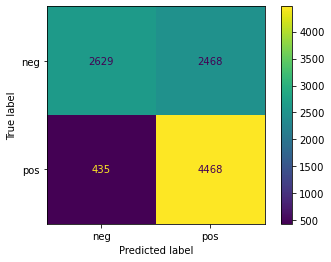

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(confusion_matrix(df["label"], df["comp_score"]))
ConfusionMatrixDisplay.from_predictions(df["label"], df["comp_score"])

# 7.3

In [117]:
df = pd.read_csv("moviereviews.tsv", sep="\t")
df = df.dropna()
print(df["label"].value_counts())
df.head()

neg    983
pos    982
Name: label, dtype: int64


label                                             review
0   neg  how do films like mouse hunt get into theatres...
1   neg  some talented actresses are blessed with a dem...
2   pos  this has been an extraordinary year for austra...
3   pos  according to hollywood movies made in last few...
4   neg  my first press screening of 1998 and already i...

In [118]:
df["pred"] = df["review"].apply(lambda x: "pos" if sid.polarity_scores(x)["compound"] >= 0 else "neg")
df.head()

label                                             review pred
0   neg  how do films like mouse hunt get into theatres...  neg
1   neg  some talented actresses are blessed with a dem...  neg
2   pos  this has been an extraordinary year for austra...  pos
3   pos  according to hollywood movies made in last few...  pos
4   neg  my first press screening of 1998 and already i...  neg

              precision    recall  f1-score   support

         neg       0.72      0.43      0.54       983
         pos       0.60      0.83      0.69       982

    accuracy                           0.63      1965
   macro avg       0.66      0.63      0.62      1965
weighted avg       0.66      0.63      0.62      1965

[[427 556]
 [164 818]]


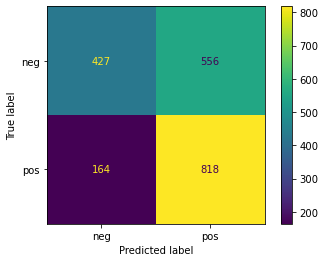

In [119]:
print(classification_report(df["label"], df["pred"]))
print(confusion_matrix(df["label"], df["pred"]))
ConfusionMatrixDisplay.from_predictions(df["label"], df["pred"])